# Get associations between cell type associations for eQTLs and GWAS

In [2]:
setwd("/frazer01/projects/CARDIPS/analysis/cardiac_gwas_coloc")

source("script/functions.R"  )


In [3]:
dir.create("pipeline/eqtl.2.gwas_coloc"       , showWarnings = FALSE)


In [4]:
qtl_list = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/input/qtl/qtls.RDS"   )
exp_list = readRDS("/frazer01/projects/CARDIPS/analysis/cardiac_qtls_combined/input/expdata_qtl.rds")

In [43]:
phenotypes            = c("rna", "isoform")
qtls                  = qtl_list$qtl[phenotypes]
cell_assocs           = as.data.frame(rbindlist(qtl_list$interactions[phenotypes]), stringsAsFactors = FALSE)
coordinates           = exp_list$coordinates
rownames(coordinates) = coordinates$transcript_id
coordinates           = coordinates[ coordinates$phenotype %in% phenotypes,]

In [107]:
manifest       = add_rownames(fread  ("pipeline/1.1.sumstats/manifest.txt"                             , sep = "\t", header = TRUE, data.table = FALSE))


In [23]:
coloc = fread("pipeline/4.1.coloc_qtls/coloc.txt", sep = "\t", header = TRUE, data.table = FALSE)
coloc = merge(coordinates[,c("transcript_id", "gene_id", "gene_name", "phenotype")], coloc[ coloc$transcript_id %in% coordinates$transcript_id & coloc$pop == "meta",])


In [45]:
coloc      $trid = paste(coloc      $transcript_id, coloc      $type)
cell_assocs$trid = paste(cell_assocs$transcript_id, cell_assocs$type)
cells            = sort(unique(cell_assocs$interaction))

for(cell in cells)
{
    coloc[, paste("interaction", cell, sep = ".")] = 0
    
    incell = cell_assocs[ cell_assocs$interaction == cell & cell_assocs$cell == TRUE, "trid"]
    
    coloc[coloc$trid %in% incell, paste("interaction", cell, sep = ".")] = 1
}


In [46]:
fwrite(coloc, "pipeline/eqtl.2.gwas_coloc/coloc.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

In [49]:
length(unique(coloc$gwas))
length(unique(coloc$locus))
length(unique(coloc$transcript_id))
length(unique(coloc$gene_id))


[1] 27

[1] 1530

[1] 11827

[1] 7873

In [50]:
pph4 = coloc[ coloc$PP.H4.abf >= 0.8,]

length(unique(pph4$gwas))
length(unique(pph4$locus))
length(unique(pph4$transcript_id))
length(unique(pph4$gene_id))


[1] 27

[1] 595

[1] 1811

[1] 1380

In [51]:
head(sort(table(unique(pph4[,c("gwas", "transcript_id")])[,"gwas"]), decreasing = TRUE))


 continuous-PP-both_sexes-combined_medadj_irnt 
                                           278 
continuous-MAP-both_sexes-combined_medadj_irnt 
                                           274 
continuous-SBP-both_sexes-combined_medadj_irnt 
                                           268 
continuous-DBP-both_sexes-combined_medadj_irnt 
                                           261 
              continuous-21001-both_sexes-irnt 
                                           244 
              biomarkers-30760-both_sexes-irnt 
                                           214 

In [52]:
head(sort(table(unique(pph4[,c("locus", "transcript_id")])[,"locus"]), decreasing = TRUE))


  17_40144007_48070076    6_25044242_33934568    3_46327835_53972391 
                    51                     47                     40 
 1_153504112_156982996   7_98617923_100905508 12_120616417_125562664 
                    27                     24                     23 

In [55]:
head(sort(table(unique(pph4[ pph4$interaction.ipsc_cvpc == 1, c("gwas", "transcript_id")])[,"gwas"]), decreasing = TRUE))



 continuous-PP-both_sexes-combined_medadj_irnt 
                                             8 
continuous-MAP-both_sexes-combined_medadj_irnt 
                                             6 
continuous-SBP-both_sexes-combined_medadj_irnt 
                                             6 
              biomarkers-30600-both_sexes-irnt 
                                             5 
continuous-DBP-both_sexes-combined_medadj_irnt 
                                             4 
              biomarkers-30760-both_sexes-irnt 
                                             3 

In [56]:
head(sort(table(unique(pph4[ pph4$interaction.adult     == 1, c("gwas", "transcript_id")])[,"gwas"]), decreasing = TRUE))



                continuous-102-both_sexes-irnt 
                                            14 
        continuous-LDLC-both_sexes-medadj_irnt 
                                            12 
              biomarkers-30760-both_sexes-irnt 
                                            11 
              biomarkers-30870-both_sexes-irnt 
                                            11 
continuous-DBP-both_sexes-combined_medadj_irnt 
                                            11 
              continuous-21001-both_sexes-irnt 
                                            10 

In [288]:
length(unique(pph4[ pph4$interaction.ipsc_cvpc == 1, "transcript_id"]))

[1] 28

In [290]:
str(coloc)
str(pph4)

'data.frame':	125013 obs. of  33 variables:
 $ transcript_id                               : chr  "ENSG00000000457.14_7" "ENSG00000000457.14_7" "ENSG00000000457.14_7" "ENSG00000000460.17_7" ...
 $ gene_id                                     : chr  "ENSG00000000457.14_7" "ENSG00000000457.14_7" "ENSG00000000457.14_7" "ENSG00000000460.17_7" ...
 $ gene_name                                   : chr  "SCYL3" "SCYL3" "SCYL3" "C1orf112" ...
 $ phenotype                                   : chr  "rna" "rna" "rna" "rna" ...
 $ nsnps                                       : int  1513 1513 1513 1933 1933 1933 994 994 994 994 ...
 $ PP.H0.abf                                   : num  1.56e-07 1.58e-07 8.71e-03 1.06e-02 1.89e-07 ...
 $ PP.H1.abf                                   : num  0.387 0.39 0.378 0.462 0.47 ...
 $ PP.H2.abf                                   : num  2.38e-07 2.41e-07 1.33e-02 1.13e-02 2.01e-07 ...
 $ PP.H3.abf                                   : num  0.592 0.597 0.579 0.491 0.499 .

# Enrichment by trait (like in Margaret's paper)

In [111]:
calculate_enrichment = function(trait, cell, coloc, thresholds = (1:19) / 20)
{
    coloc = coloc[ coloc$gwas == trait, ]
    tests = as.data.frame(rbindlist(lapply(thresholds, function(threshold)
    {
        totest = matrix(c(nrow(coloc[ coloc$PP.H4.abf >= threshold & coloc[, paste("interaction", cell, sep = ".")] == 1, ]),
                          nrow(coloc[ coloc$PP.H4.abf >= threshold & coloc[, paste("interaction", cell, sep = ".")] == 0, ]),
                          nrow(coloc[ coloc$PP.H4.abf <  threshold & coloc[, paste("interaction", cell, sep = ".")] == 1, ]),
                          nrow(coloc[ coloc$PP.H4.abf <  threshold & coloc[, paste("interaction", cell, sep = ".")] == 0, ])
                         ), nrow = 2, byrow = TRUE)
        
        test = fisher.test(totest)
        out  = data.frame(trait = trait, cell = cell, threshold = threshold, 
                          x11 = totest[1,1], x12 = totest[1,2], x21 = totest[2,1], x22 = totest[2,2],
                          estimate = test$estimate, ci1 = test$conf.int[[1]], ci2 = test$conf.int[[2]], pval = test$p.value
                         )
                      
        return(out)
    })), stringsAsFactors = FALSE)
    
    return(tests)
}

trait = "continuous-PP-both_sexes-combined_medadj_irnt"
cell  = "adult"


enr1 = as.data.frame(rbindlist(lapply(sort(unique(coloc$gwas)), function(trait)
{
    as.data.frame(rbindlist(lapply(cells, function(cell){calculate_enrichment(trait, cell, coloc)})), stringsAsFactors = FALSE)
})), stringsAsFactors = FALSE)

enr1$log2r = log2(enr1$estimate)

enr1[is.nan(enr1$log2r) == TRUE, "log2r"] = 0

In [292]:
fwrite(enr1, "pipeline/eqtl.2.gwas_coloc/enrichment_by_pp.txt", sep = "\t", col.names = TRUE, row.names = FALSE)

In [267]:

colordata1 = exp_list[["color"]][["by_organ" ]]
colordata2 = exp_list[["color"]][["by_tissue"]]
colordata3 = exp_list[["color"]][["by_cell"  ]]

colordata2 = colordata2[ colordata2$body_site != "ipsc_cvpc",]
colordata3 = colordata3[,c("cell_type", "name", "color", "order")]

colnames(colordata3) = colnames(colordata1)

colordata1$order = c(3:4, 1:2)

colordata1$type = c("stage", "stage", "organ", "organ")
colordata2$type = "tissue"
colordata3$type = "cell"

colordata1$pch = c(21, 21, 22, 22)
colordata2$pch = 23
colordata3$pch = 24

colordata1 = colordata1[order(colordata1$order),]

colordata = as.data.frame(rbindlist(list(colordata1, colordata2, colordata3)), stringsAsFactors = FALSE)

colordata$y = 1:nrow(colordata)

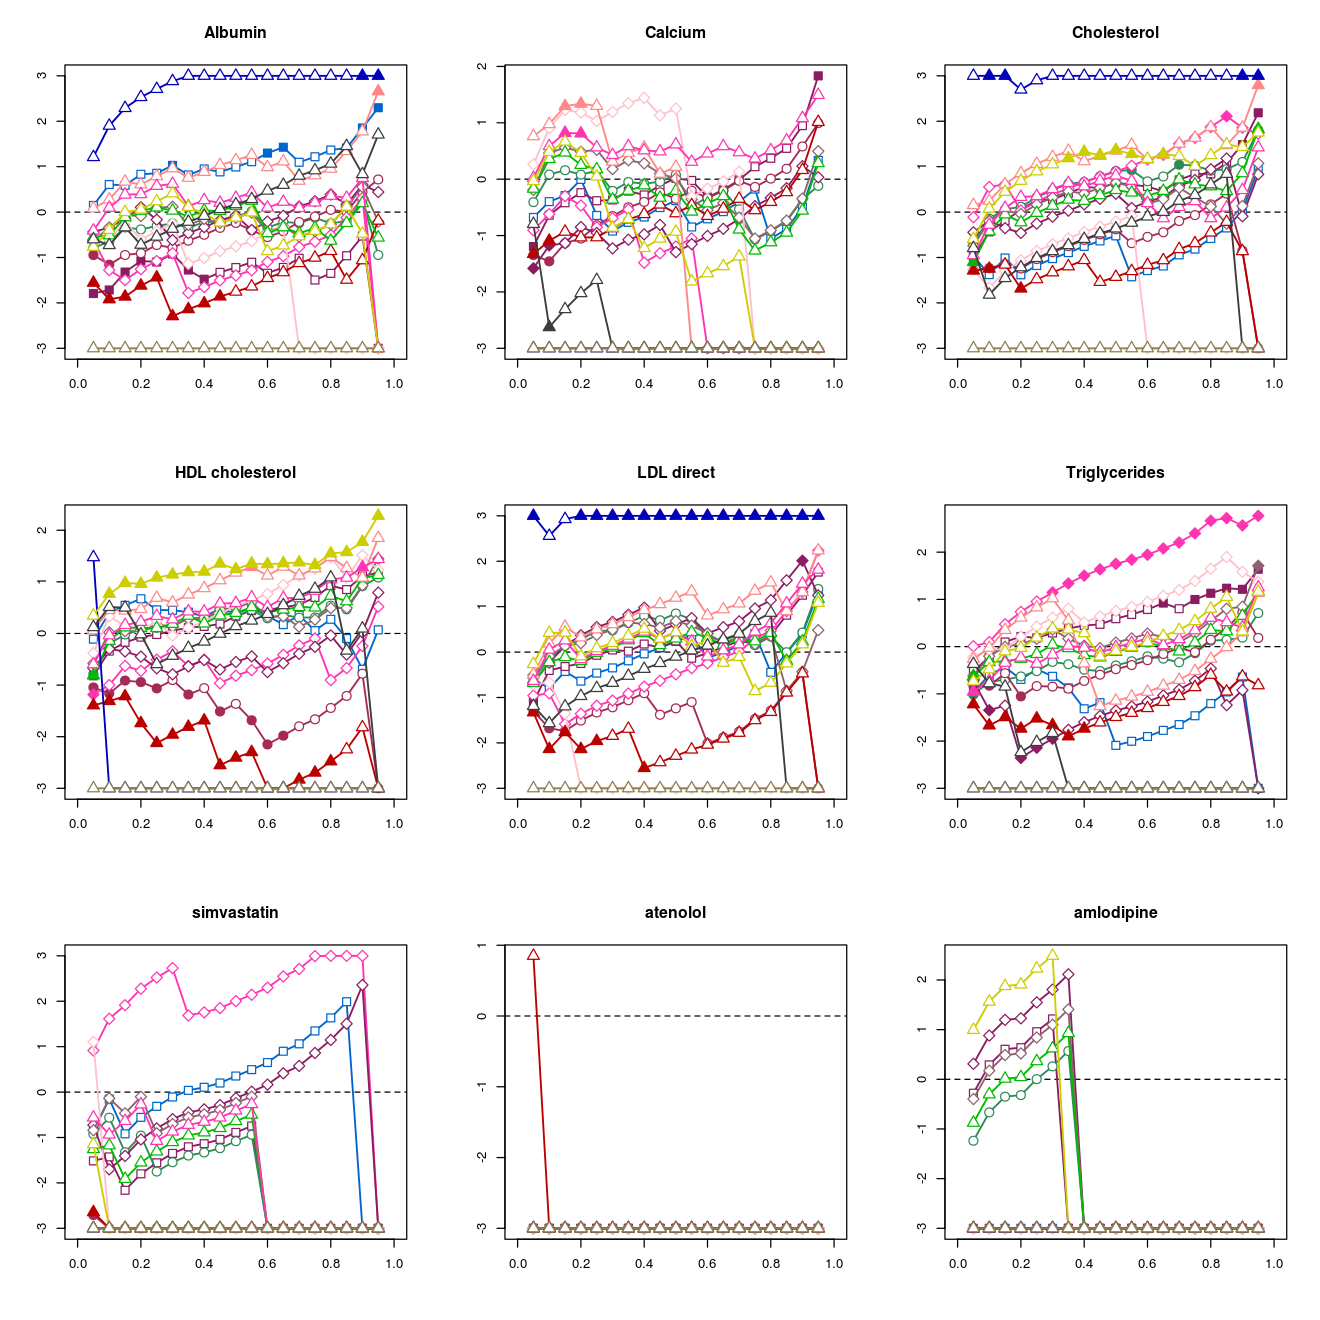

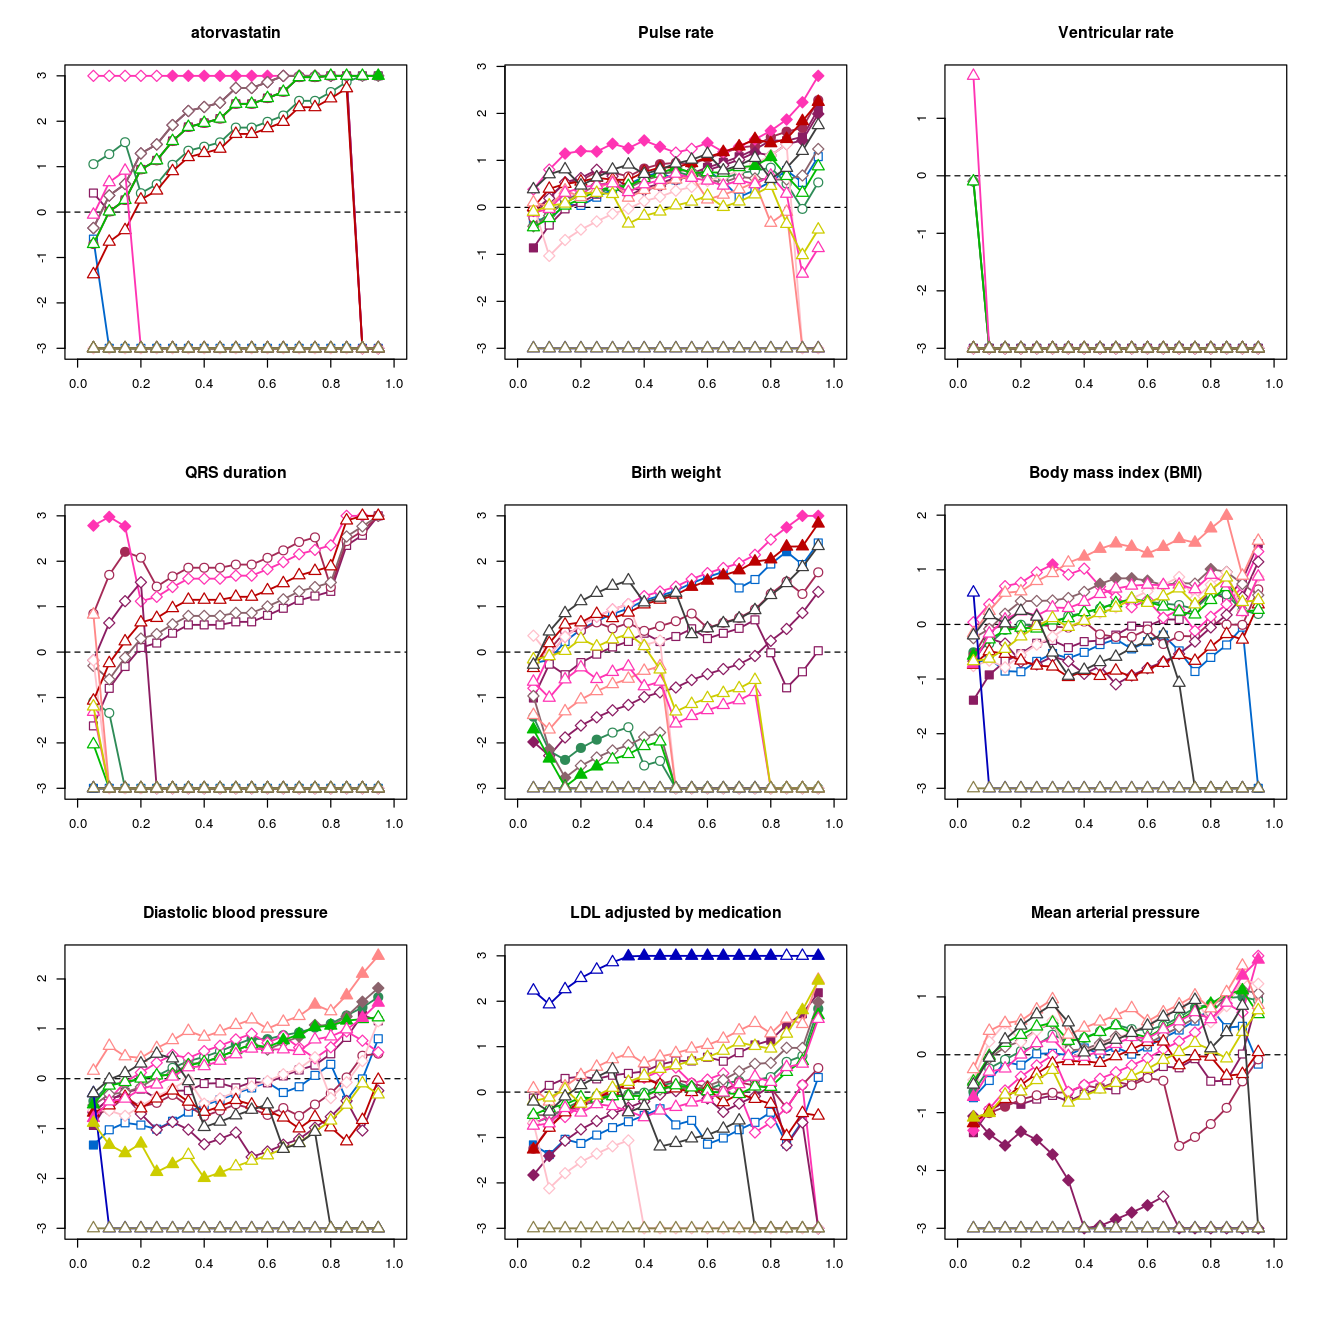

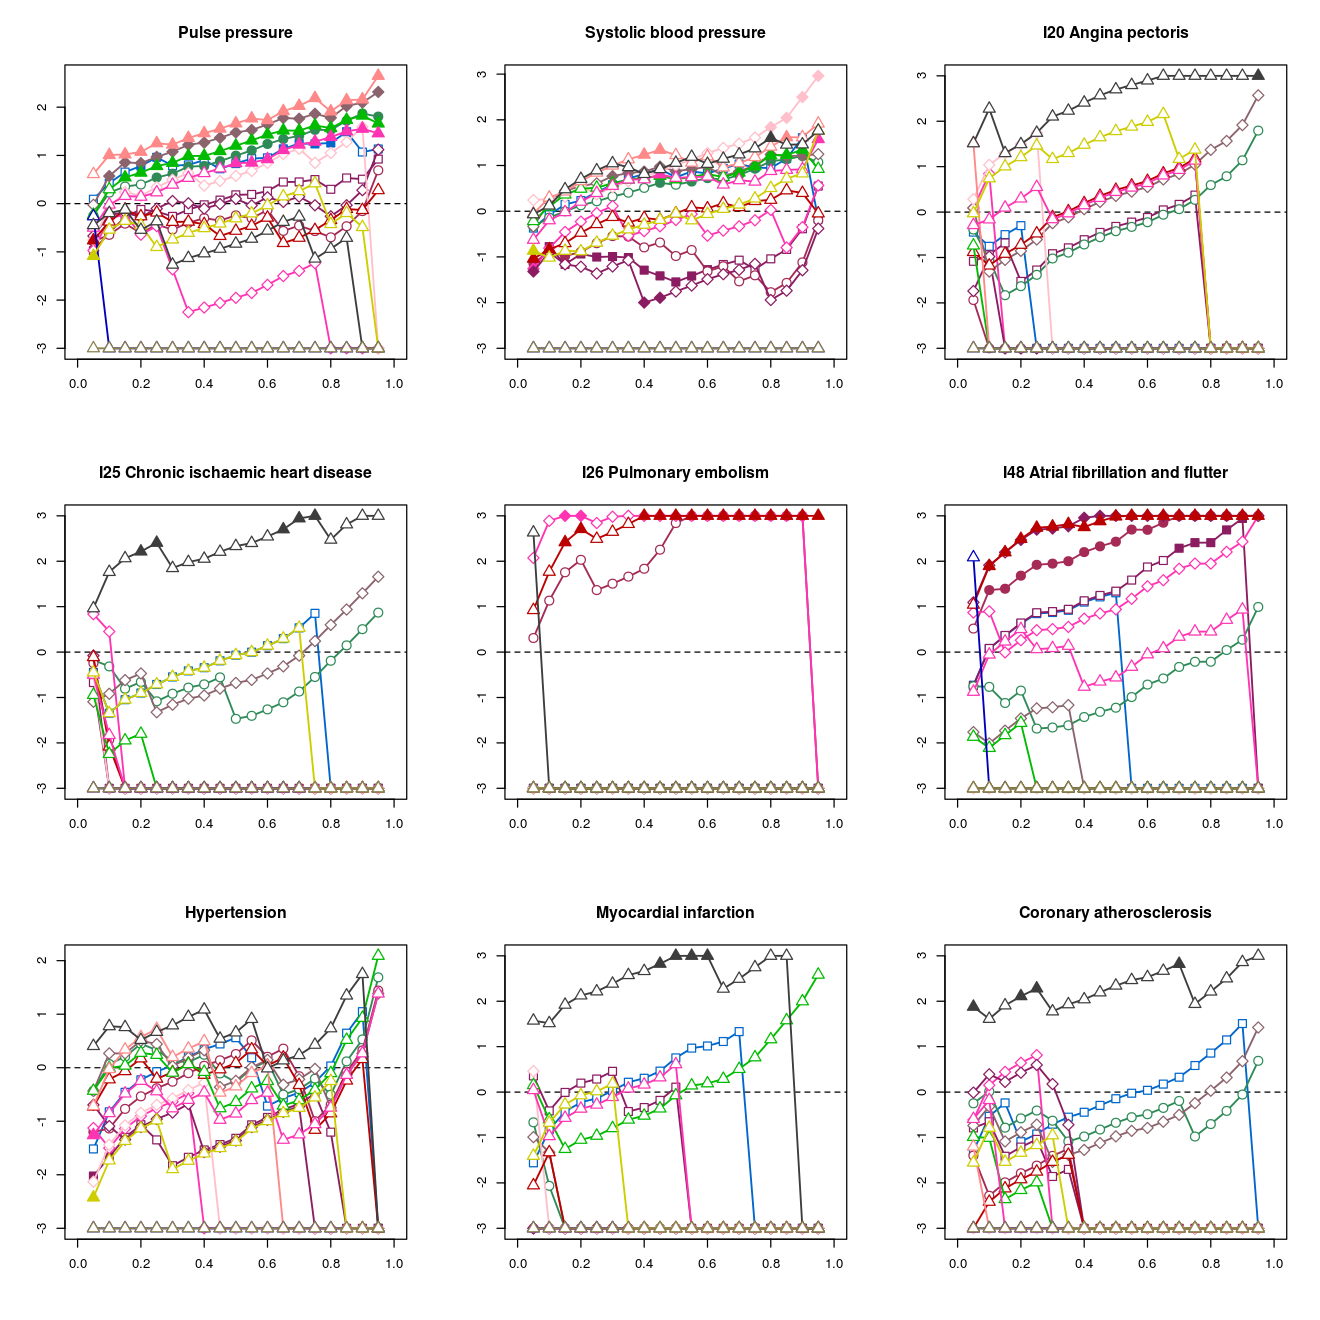

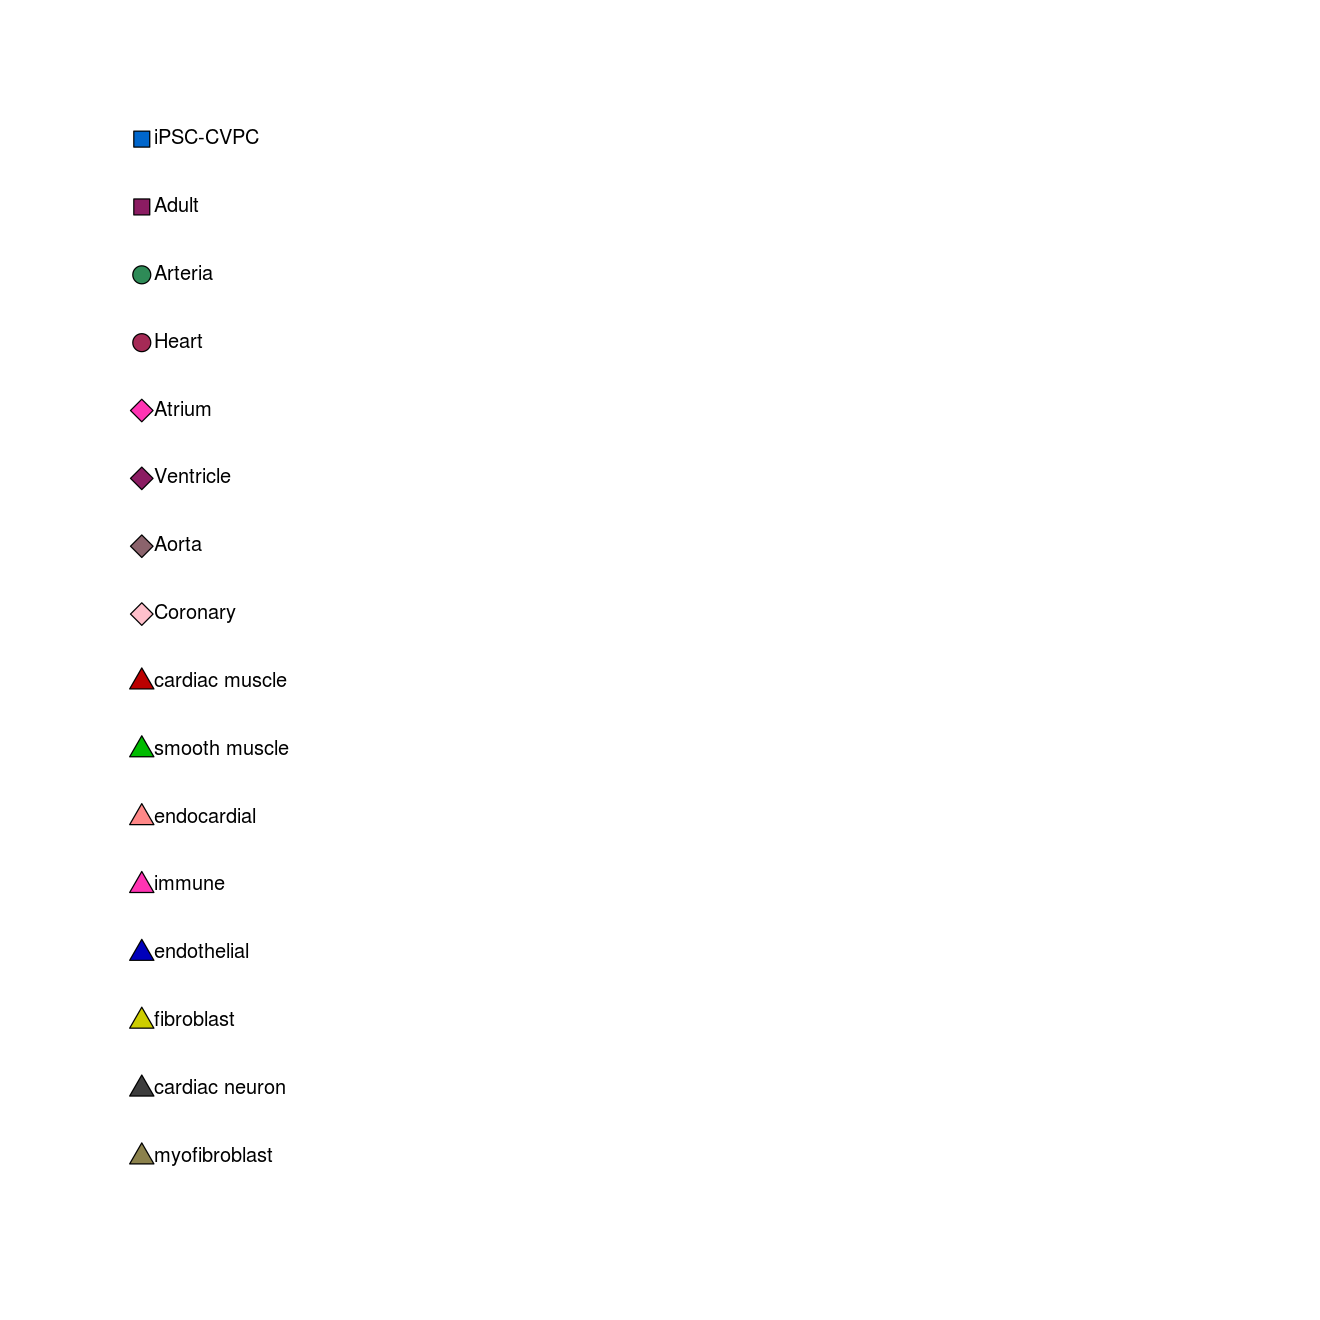

In [270]:
plot_enrichment = function(trait, enr1, colordata)
{
    x = enr1[ enr1$trait == trait, ]
    
    if(nrow(x[ x$log2r >=  3, ]) > 0){x[ x$log2r >=  3, "log2r"] =  3}
    if(nrow(x[ x$log2r <= -3, ]) > 0){x[ x$log2r <= -3, "log2r"] = -3}
    
    plot(1,1, type = "n", xlim = c(0,1), ylim = range(x$log2r), xlab = "", ylab = "", main = manifest[trait, "name"])
    
    abline(h = 0, lty = "dashed")
    
    for (cell in colordata$body_site)
    {
        toplot = x[ x$cell == cell,]
        color  = colordata[ colordata$body_site == cell, "color"]
        pch    = colordata[ colordata$body_site == cell, "pch"  ]
        toplot$bg = "#ffffff"
        
        if(nrow(toplot[toplot$pval <= 0.05,]) > 0){toplot[toplot$pval <= 0.05, "bg"] = color}
        
        lines (x = toplot$threshold, y = toplot$log2r, col = color, lwd =  1.5)
        points(x = toplot$threshold, y = toplot$log2r, col = color, pch = pch, bg = toplot$bg, cex = 1.5)
    }
}

trait = "continuous-PP-both_sexes-combined_medadj_irnt"

options(repr.plot.width = 11, repr.plot.height = 11)

layout(matrix(1:9, nrow = 3, byrow = TRUE))


invisible(lapply(manifest$id, function(trait){plot_enrichment(trait, enr1, colordata)}))

layout(1)
plot(1,1, type = "n", xlim = c(0,1), ylim = c(nrow(colordata), 1), xlab = "", ylab = "", axes = FALSE)

points(x = rep(0, nrow(colordata)), y = colordata$y, pch    = colordata$pch   , bg  = colordata$color, cex = 2)
text  (x = rep(0, nrow(colordata)), y = colordata$y, labels = colordata$tissue, pos = 4)



In [291]:
str(enr1)

'data.frame':	8208 obs. of  12 variables:
 $ trait    : chr  "biomarkers-30600-both_sexes-irnt" "biomarkers-30600-both_sexes-irnt" "biomarkers-30600-both_sexes-irnt" "biomarkers-30600-both_sexes-irnt" ...
 $ cell     : chr  "adult" "adult" "adult" "adult" ...
 $ threshold: num  0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 0.5 ...
 $ x11      : int  12 8 8 8 7 7 5 4 4 4 ...
 $ x12      : int  1249 830 650 557 497 444 403 371 336 313 ...
 $ x21      : int  188 192 192 192 193 193 195 196 196 196 ...
 $ x22      : int  5646 6065 6245 6338 6398 6451 6492 6524 6559 6582 ...
 $ estimate : num  0.289 0.305 0.4 0.474 0.467 ...
 $ ci1      : num  0.146 0.129 0.17 0.201 0.184 ...
 $ ci2      : num  0.518 0.615 0.81 0.96 0.988 ...
 $ pval     : num  1.22e-06 1.38e-04 6.21e-03 3.34e-02 4.89e-02 ...
 $ log2r    : num  -1.79 -1.72 -1.32 -1.08 -1.1 ...


In [293]:
x = merge(manifest[,c("id", "name")], enr1[ enr1$threshold == 0.8, ], by.x = "id", by.y = "trait")
x$padj = p.adjust(x$pval, method = "BH")
x[order(x$pval),]

,id,name,cell,threshold,x11,x12,x21,x22,estimate,ci1,ci2,pval,log2r,padj
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
290,continuous-PP-both_sexes-combined_medadj_irnt,Pulse pressure,arteria,0.8,29,268,332,8847,2.882984,1.8648530,4.315226,2.887027e-06,1.527563,0.001130629
291,continuous-PP-both_sexes-combined_medadj_irnt,Pulse pressure,arteria_aorta,0.8,21,276,199,8980,3.432673,2.0459091,5.497351,5.234391e-06,1.779333,0.001130629
300,continuous-PP-both_sexes-combined_medadj_irnt,Pulse pressure,cibersort.regular.smooth_muscle,0.8,23,274,253,8926,2.960942,1.8125040,4.635851,1.782623e-05,1.566056,0.002566978
94,biomarkers-30870-both_sexes-irnt,Triglycerides,heart_atrium,0.8,9,181,58,7411,6.349659,2.7233194,13.161661,3.634219e-05,2.666679,0.003924956
373,icd10-I48-both_sexes,I48 Atrial fibrillation and flutter,cibersort.regular.cardiac_muscle,0.8,6,20,22,858,11.608283,3.4728879,34.004877,7.501489e-05,3.537083,0.006481286
381,icd10-I48-both_sexes,I48 Atrial fibrillation and flutter,heart,0.8,6,20,26,854,9.784989,2.9676059,28.130632,1.669113e-04,3.290570,0.012017613
173,continuous-102-both_sexes-irnt,Pulse rate,heart,0.8,13,200,149,6468,2.820908,1.4423176,5.084194,1.573166e-03,1.496160,0.079559173
383,icd10-I48-both_sexes,I48 Atrial fibrillation and flutter,heart_ventricle,0.8,3,23,6,874,18.762570,2.8623753,94.788164,1.574903e-03,4.229786,0.079559173
161,continuous-102-both_sexes-irnt,Pulse rate,adult,0.8,14,199,169,6448,2.683577,1.4104950,4.736038,1.657483e-03,1.424157,0.079559173


In [263]:
enrichment_score = function(trait, enr1, cell)
{
    #message(paste(trait, cell))
    x = enr1[ enr1$trait == trait & enr1$cell == cell & enr1$x11 > 0, ]
    
    if(nrow(x) > 1)
    {
        
        if(nrow(x[ is.infinite(x$estimate) == TRUE & x$estimate > 0, ]) > 0){x[ is.infinite(x$estimate) == TRUE  & x$estimate > 0, "estimate"] = max(x[ is.infinite(x$estimate) == FALSE, "estimate"])}
        if(nrow(x[ is.infinite(x$estimate) == TRUE & x$estimate < 0, ]) > 0){x[ is.infinite(x$estimate) == TRUE  & x$estimate < 0, "estimate"] = min(x[ is.infinite(x$estimate) == FALSE, "estimate"])}
        
        x$weight = (1 -log10(x$pval)) 
        x$score  = scale(x$estimate)
        
        mylm = summary(lm(score ~ threshold, data = x, weights = x$weight))$coefficients
        out  = data.frame(trait = trait, 
                          cell  = cell, 
                          n     = nrow(x),
                          beta  = mylm[2, "Estimate"  ],
                          se    = mylm[2, "Std. Error"],
                          pval  = mylm[2, "Pr(>|t|)"  ]
                         )
    }else
    {
        out  = data.frame(trait = trait, 
                          cell  = cell, 
                          n     = nrow(x),
                          beta  = 0,
                          se    = 1,
                          pval  = 1
                         )
    }
    
    return(out)
}

trait = "icd10-I26-both_sexes"
cell  = "cibersort.regular.cardiac_muscle"
x     = enrichment_score(trait, enr1, cell)

x

scores = as.data.frame(rbindlist(lapply(sort(unique(coloc$gwas)), function(trait)
{
    as.data.frame(rbindlist(lapply(cells, function(cell){enrichment_score(trait, enr1, cell)})), stringsAsFactors = FALSE)
})), stringsAsFactors = FALSE)

scores[is.nan(scores$pval) == TRUE, "pval"] = 1

scores$qval = p.adjust(scores$pval, method = "bonferroni")


trait,cell,n,beta,se,pval
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,19,3.496852,0.3238896,4.978528e-09


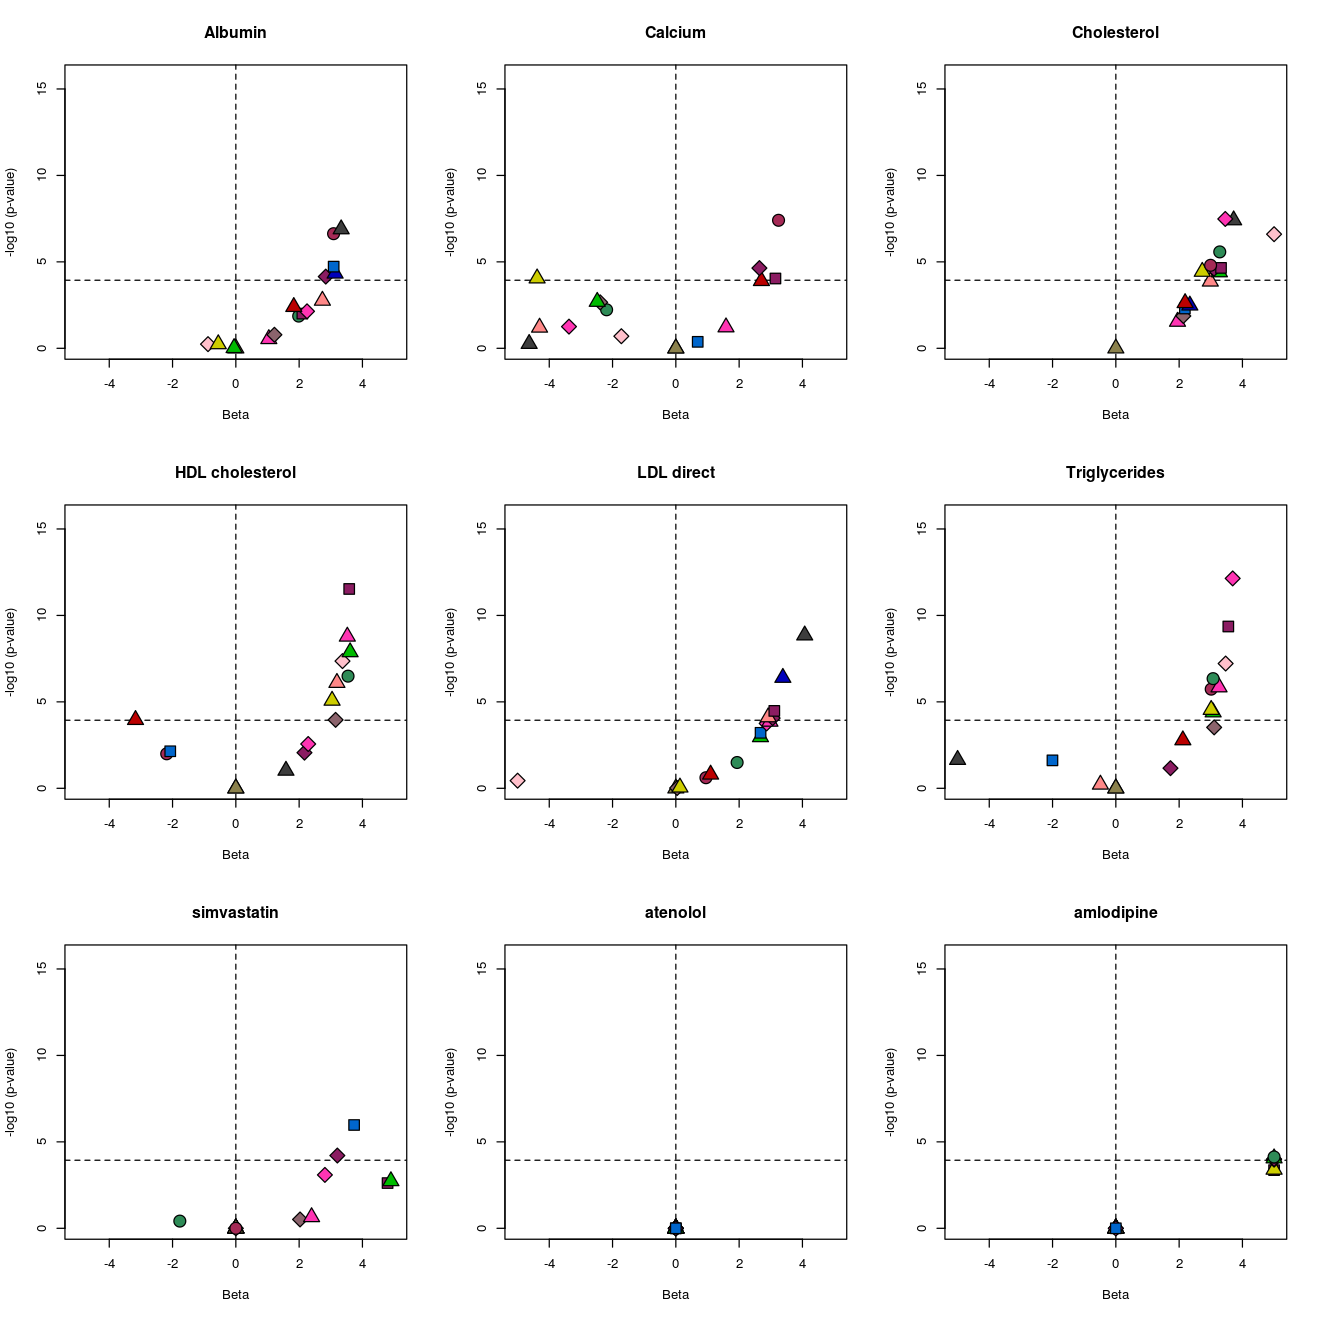

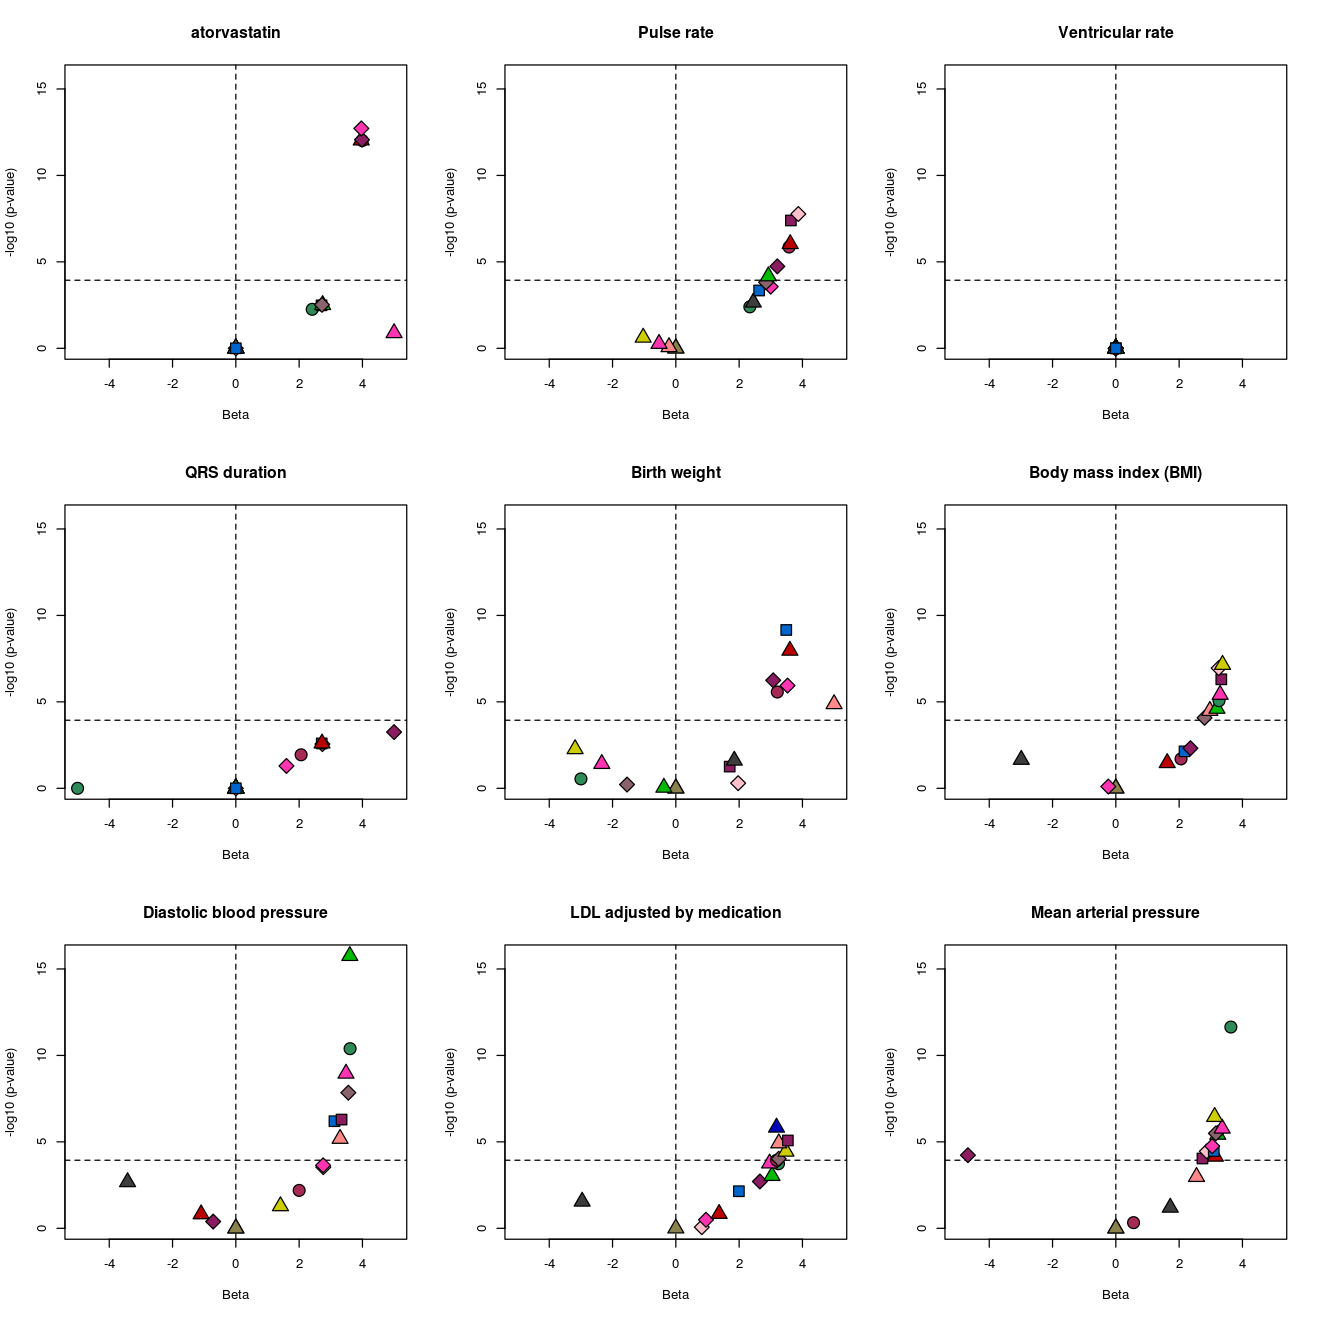

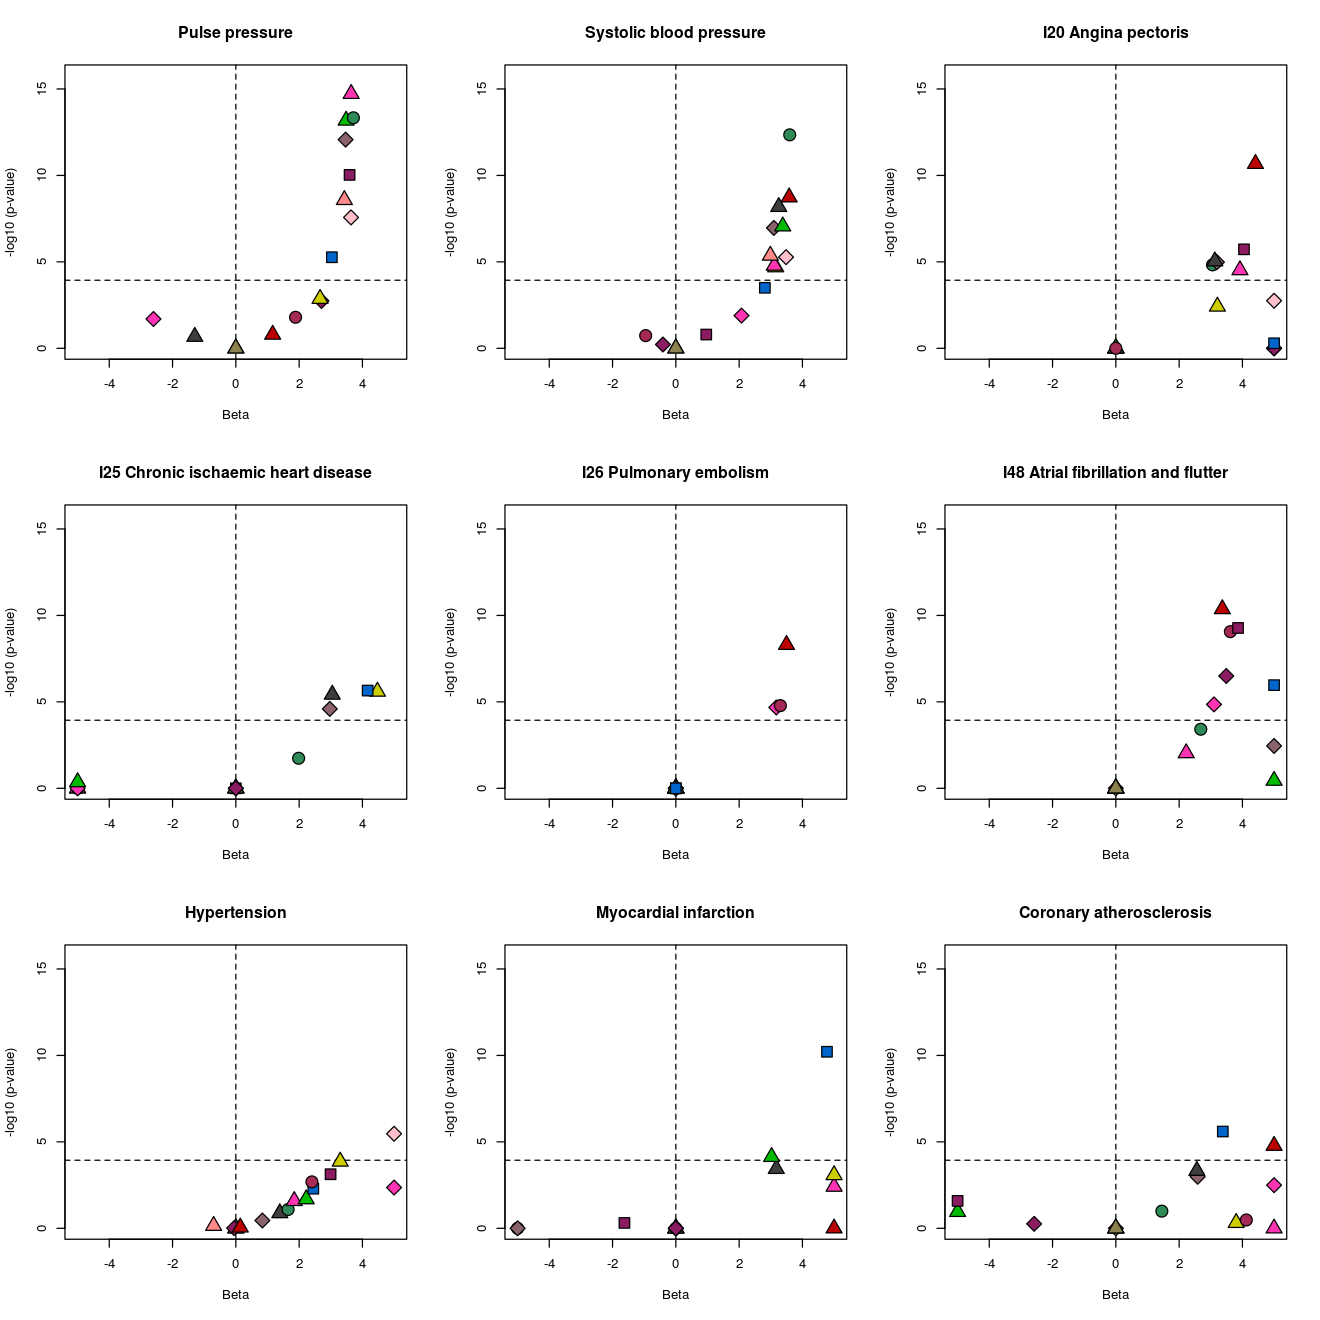

In [271]:
plot_scores = function(trait, scores, colordata)
{
    x      = merge(scores[ scores$trait == trait, ], colordata, by.x = "cell", by.y = "body_site")
    x      = x[order(x$pval, decreasing = TRUE),]
    x$logp = -log10(x$pval)
    
    if(nrow(x[x$beta >  5, ]) > 0){x[x$beta >  5, "beta"] =  5}
    if(nrow(x[x$beta < -5, ]) > 0){x[x$beta < -5, "beta"] = -5}
    
    plot(1,1, type = "n", xlim = c(-5, 5), ylim = c(0, max(-log10(scores$pval))), xlab = "Beta", ylab = "-log10 (p-value)", main = manifest[trait, "name"])
    
    abline(h = -log10(0.05 / nrow(scores)), lty = "dashed")
    abline(v =        0                   , lty = "dashed")
    
    points(x = x$beta, y = x$logp, pch = x$pch, bg = x$color, cex = 2)
}

#trait = "biomarkers-30600-both_sexes-irnt"
options(repr.plot.width = 11, repr.plot.height = 11)

layout(matrix(1:9, nrow = 3, byrow = TRUE))

invisible(lapply(sort(unique(coloc$gwas)), function(trait){plot_scores(trait, scores, colordata)}))


In [240]:

enr1  [ enr1  $trait == "icd10-I26-both_sexes" & enr1  $cell == "cibersort.regular.cardiac_muscle",]
scores[ scores$trait == "icd10-I26-both_sexes" & scores$cell == "cibersort.regular.cardiac_muscle",]


,trait,cell,threshold,x11,x12,x21,x22,estimate,ci1,ci2,pval,log2r
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6765,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.05,3,44,10,279,1.897920,0.3231650,7.763207,0.403736444,0.9244188
6766,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.10,3,26,10,297,3.407303,0.5678312,14.382597,0.091743812,1.7686304
6767,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.15,3,17,10,306,5.347036,0.8671627,23.537050,0.035241104,2.4187394
6768,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.20,3,14,10,309,6.541931,1.0434907,29.553949,0.022525161,2.7097164
6769,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.25,2,10,11,313,5.629531,0.5382655,31.668222,0.073309550,2.4930146
6770,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.30,2,9,11,314,6.267773,0.5921024,36.061618,0.062453751,2.6479529
6771,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.35,2,8,11,315,7.063612,0.6574604,41.906153,0.052239117,2.8204061
6772,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.40,2,7,11,316,8.081931,0.7384823,49.917410,0.042724915,3.0146999
6773,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,0.45,2,5,11,318,11.323131,0.9772629,79.446070,0.026050209,3.5012010


,trait,cell,n,beta,se,pval,qval
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
357,icd10-I26-both_sexes,cibersort.regular.cardiac_muscle,19,68.56807,6.350993,4.978528e-09,7.681158e-08


In [201]:
merge(manifest[, c("id", "name")], scores[ scores$intercept_qval <= 0.05 & scores$slope_qval <= 0.05,], by.x = "id", by.y = "trait")

id,name,cell,n,intercept.beta,intercept.se,intercept.pval,slope.beta,slope.se,slope.pval,intercept_qval,slope_qval
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
biomarkers-30600-both_sexes-irnt,Albumin,adult,18,0.3293017,0.02963580,6.217876e-09,0.1945723,0.06641864,9.820781e-03,1.109499e-07,2.059503e-02
biomarkers-30600-both_sexes-irnt,Albumin,arteria,19,0.6727387,0.05515252,7.832595e-10,0.2917610,0.10610050,1.367215e-02,2.416915e-08,2.799226e-02
biomarkers-30600-both_sexes-irnt,Albumin,cibersort.regular.cardiac_muscle,19,0.2254813,0.03950999,2.569064e-05,0.2827624,0.08497888,3.986680e-03,1.018198e-04,9.052841e-03
biomarkers-30600-both_sexes-irnt,Albumin,heart,19,0.3543423,0.05767145,1.080875e-05,0.9314138,0.11272309,2.343821e-07,4.764672e-05,2.201153e-06
biomarkers-30600-both_sexes-irnt,Albumin,heart_atrium,18,0.2863695,0.08722214,4.681882e-03,0.5309259,0.17262237,7.239731e-03,1.136277e-02,1.544331e-02
biomarkers-30600-both_sexes-irnt,Albumin,heart_ventricle,19,0.6472522,0.07491123,1.259900e-07,0.6719262,0.12901983,7.108900e-05,1.183211e-06,2.559204e-04
biomarkers-30600-both_sexes-irnt,Albumin,ipsc_cvpc,19,0.9618222,0.26644542,2.162283e-03,2.6211743,0.44708588,1.881445e-05,5.527256e-03,8.379220e-05
biomarkers-30680-both_sexes-irnt,Calcium,arteria,19,1.0471205,0.07665862,1.354333e-10,-0.4241300,0.13483329,5.898608e-03,8.683618e-09,1.286969e-02
biomarkers-30680-both_sexes-irnt,Calcium,arteria_aorta,19,1.4164236,0.12228703,1.725712e-09,-0.8137217,0.22579613,2.190811e-03,4.464269e-08,5.439255e-03


In [198]:
scores

trait,cell,n,intercept.beta,intercept.se,intercept.pval,slope.beta,slope.se,slope.pval
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
biomarkers-30600-both_sexes-irnt,adult,18,0.3293017,0.02963580,6.217876e-09,0.194572289,0.06641864,9.820781e-03
biomarkers-30600-both_sexes-irnt,arteria,19,0.6727387,0.05515252,7.832595e-10,0.291761008,0.10610050,1.367215e-02
biomarkers-30600-both_sexes-irnt,arteria_aorta,19,0.7900122,0.08762433,6.910679e-08,0.227459665,0.15654168,1.644255e-01
biomarkers-30600-both_sexes-irnt,arteria_coronary,13,0.7072373,0.07496705,1.319183e-06,-0.111320042,0.19231793,5.743626e-01
biomarkers-30600-both_sexes-irnt,cibersort.regular.cardiac_muscle,19,0.2254813,0.03950999,2.569064e-05,0.282762362,0.08497888,3.986680e-03
biomarkers-30600-both_sexes-irnt,cibersort.regular.cardiac_neuron,19,0.1314440,0.17453278,4.616815e-01,2.484468845,0.28791244,1.282592e-07
biomarkers-30600-both_sexes-irnt,cibersort.regular.endocardial,19,0.6753386,0.49499053,1.902488e-01,3.093656798,0.83344126,1.732456e-03
biomarkers-30600-both_sexes-irnt,cibersort.regular.endothelial,19,-7.1517689,4.99990528,1.707314e-01,44.635134907,8.24790420,4.674341e-05
biomarkers-30600-both_sexes-irnt,cibersort.regular.fibroblast,18,0.9327299,0.10844995,2.141547e-07,-0.120883582,0.20770052,5.686714e-01


ERROR: Error in scale(1:10, center = TRUE, from = 0, to = 1): unused arguments (from = 0, to = 1)


In [132]:
manifest$id

[1] "biomarkers-30600-both_sexes-irnt"              
 [2] "biomarkers-30680-both_sexes-irnt"              
 [3] "biomarkers-30690-both_sexes-irnt"              
 [4] "biomarkers-30760-both_sexes-irnt"              
 [5] "biomarkers-30780-both_sexes-irnt"              
 [6] "biomarkers-30870-both_sexes-irnt"              
 [7] "categorical-20003-both_sexes-1140861958"       
 [8] "categorical-20003-both_sexes-1140866738"       
 [9] "categorical-20003-both_sexes-1140879802"       
[10] "categorical-20003-both_sexes-1141146234"       
[11] "continuous-102-both_sexes-irnt"                
[12] "continuous-12336-both_sexes-irnt"              
[13] "continuous-12340-both_sexes-irnt"              
[14] "continuous-20022-both_sexes-irnt"              
[15] "continuous-21001-both_sexes-irnt"              
[16] "continuous-DBP-both_sexes-combined_medadj_irnt"
[17] "continuous-LDLC-both_sexes-medadj_irnt"        
[18] "continuous-MAP-both_sexes-combined_medadj_irnt"
[19] "continuous-PP-both_sexes-combined_medadj_irnt" 
[20] "continuous-SBP-both_sexes-combined_medadj_irnt"
[21] "icd10-I20-both_sexes"                          
[22] "icd10-I25-both_sexes"                          
[23] "icd10-I26-both_sexes"                          
[24] "icd10-I48-both_sexes"                          
[25] "phecode-401-both_sexes"                        
[26] "phecode-411.2-both_sexes"                      
[27] "phecode-411.4-both_sexes"